<a href="https://colab.research.google.com/github/chloeblanchon/Project_Blanchon/blob/main/Projet_ML_BLANCHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MPA-MLF - Project
### Classification of wireless transmitters
##### Chloé Blanchon
##### Date: 20.3.2023

### Model MLP

#### Data preprocessing

1.	Importing the data

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD, RMSprop
import csv
import pandas as pd
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
BASE_DIR = 'https://raw.githubusercontent.com/chloeblanchon/Project_Blanchon/main/x_train.csv'
x_train = pd.read_csv(BASE_DIR)
x_train.drop('Tmix', inplace=True, axis=1)
x_train.drop('m_power', inplace=True, axis=1)
x_train.drop('Tosc', inplace=True, axis=1)
x_train.drop('Unnamed: 0', inplace=True, axis=1)

BASE_DIR_Y = 'https://raw.githubusercontent.com/chloeblanchon/Project_Blanchon/main/y_train.csv'
y_train = pd.read_csv(BASE_DIR_Y)
y_train.drop('Unnamed: 0', inplace=True, axis=1)
y_train['target'] = y_train['target'] - 1

x_test = pd.read_csv('https://raw.githubusercontent.com/chloeblanchon/Project_Blanchon/main/x_test.csv')
x_test.drop('Tmix', inplace=True, axis=1)
x_test.drop('m_power', inplace=True, axis=1)
x_test.drop('Tosc', inplace=True, axis=1)
x_test.drop('Unnamed: 0', inplace=True, axis=1)

print(" x_train shape", x_train.shape)
print("x_test shape", x_test.shape)
print("y_train shape", y_train.shape)

 x_train shape (15360, 8)
x_test shape (3840, 8)
y_train shape (15360, 1)


In [3]:
x_train

,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,592.234802,0.048079,-35.082729,-28.560846,1.993170,1.107926,1.507550,2.423943
1,-103.302032,-0.019917,-29.946953,-35.798664,-3.642311,1.236059,2.741568,3.458056
2,-582.331299,0.036379,-32.096672,-31.905628,2.835839,1.282163,2.140096,3.013522
3,-630.611267,0.063928,-38.216297,-30.084171,1.346316,1.154848,1.093465,2.254514
4,-415.526978,-0.055761,-29.180740,-36.601025,-3.963526,1.498889,3.608737,4.286684
...,...,...,...,...,...,...,...,...
15355,-476.575653,0.039874,-39.792461,-29.962997,1.143736,1.175517,1.044636,2.224311
15356,-345.645508,0.077925,-32.963398,-27.998444,2.524010,1.159356,1.948950,2.761400
15357,-613.989807,0.090771,-38.951530,-28.111988,1.145893,0.995857,0.938308,1.939818
15358,-997.769531,0.099840,-39.532818,-27.819826,1.014136,1.069736,0.875986,2.026062


In [4]:
y_train

,target
0,4
1,0
2,5
3,2
4,1
...,...
15355,2
15356,7
15357,6
15358,6


In [5]:
x_test = pd.get_dummies(x_test)
x_test

,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,516.312866,0.055910,-34.748932,-28.086121,2.064618,1.166067,1.528550,2.541858
1,-452.875031,0.091061,-31.916044,-29.092400,2.843033,1.242625,2.044024,2.974349
2,543.581909,0.067271,-34.311523,-28.395725,2.160502,1.031588,1.615977,2.427548
3,-711.415710,0.001931,-30.205307,-35.895462,-3.537908,1.260278,2.586169,3.350533
4,-912.994873,0.054695,-31.485973,-33.110847,3.031799,1.343741,2.222488,3.199810
...,...,...,...,...,...,...,...,...
3835,-1129.111816,0.071651,-40.088821,-27.627096,1.045999,0.959680,0.863437,1.836749
3836,-201.570984,-0.013889,-30.041744,-36.312626,-3.603977,1.277607,2.666203,3.413867
3837,-434.601959,-0.067320,-29.236820,-37.041874,-3.929963,1.581971,3.663174,4.409636
3838,-507.450348,0.106392,-35.374168,-29.681749,1.821150,1.218159,1.373915,2.490288


#### Model building and model training

2.	Data pre-processing

In [6]:
# Scale the features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Split the data into training and testing sets
x_train, x_test1, y_train, y_test = train_test_split(x_train, y_train, test_size=0.25, random_state=34)
# Test_size : y_train est de taille 15360 et y_test est de taille 3840, donc cela représente 25% de la taille de y_train

3.	Implementation of the model

In [7]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)

# Model
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu', input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=2, validation_data=(x_test1, y_test))

# Predict on the test set
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1) + 1

# Add the 'id' column to the test set
test_df = pd.DataFrame(x_test)
test_df['id'] = test_df.index

# Concatenate the 'id' column and the predicted target column
y_pred_df = pd.DataFrame(y_pred, columns=['target'])
y_pred_df['id'] = test_df['id']
y_pred_df = y_pred_df[['id', 'target']]

Epoch 1/20
360/360 - 2s - loss: 0.2964 - accuracy: 0.9402 - val_loss: 0.0333 - val_accuracy: 0.9961 - 2s/epoch - 6ms/step
Epoch 2/20
360/360 - 1s - loss: 0.0205 - accuracy: 0.9977 - val_loss: 0.0160 - val_accuracy: 0.9982 - 924ms/epoch - 3ms/step
Epoch 3/20
360/360 - 1s - loss: 0.0095 - accuracy: 0.9984 - val_loss: 0.0073 - val_accuracy: 0.9990 - 906ms/epoch - 3ms/step
Epoch 4/20
360/360 - 1s - loss: 0.0075 - accuracy: 0.9990 - val_loss: 0.0034 - val_accuracy: 0.9997 - 1s/epoch - 3ms/step
Epoch 5/20
360/360 - 1s - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0036 - val_accuracy: 0.9992 - 1s/epoch - 3ms/step
Epoch 6/20
360/360 - 1s - loss: 0.0038 - accuracy: 0.9996 - val_loss: 0.0015 - val_accuracy: 0.9997 - 1s/epoch - 3ms/step
Epoch 7/20
360/360 - 1s - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0027 - val_accuracy: 0.9990 - 728ms/epoch - 2ms/step
Epoch 8/20
360/360 - 1s - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0027 - val_accuracy: 0.9995 - 803ms/epoch - 2ms/step
Epoch 9/20
3

4.	Model performance evaluation 

In [8]:
y_pred_df

,id,target
0,0,5
1,1,8
2,2,5
3,3,1
4,4,6
...,...,...
3835,3835,7
3836,3836,1
3837,3837,2
3838,3838,3


In [9]:
y_pred_df.to_csv('predictions_MLP.csv', index=False)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

output = '/content/drive/My Drive/predictions_MLP.csv'
y_pred_df.to_csv(output, index=False)

Mounted at /content/drive


#### Performance tunning

In [11]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))

Accuracy: 99.97


#### Model evaluation

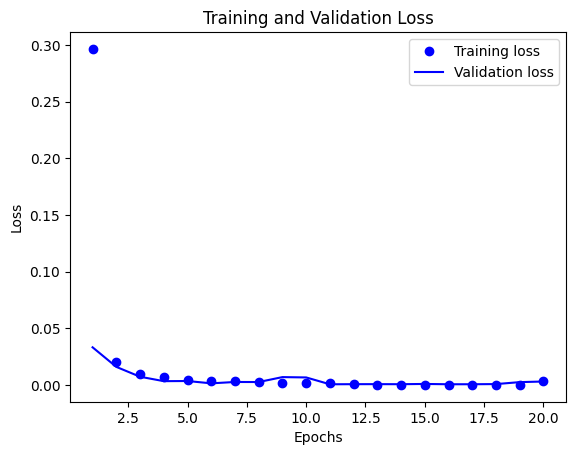

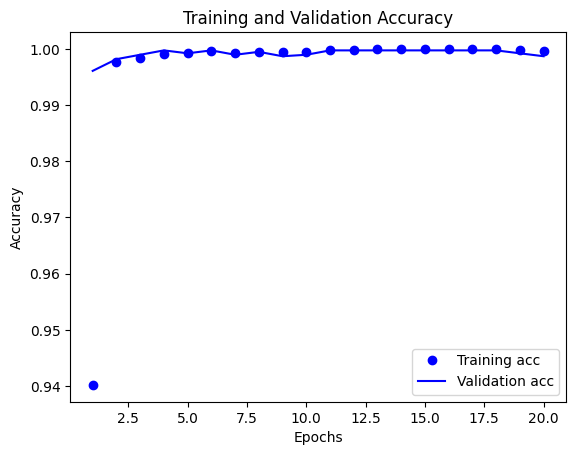

In [12]:
# Plot loss et accuracy pour les données d'entraînement et de validation
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Model SVM

1.	Importing the data

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
import csv
import pandas as pd
import csv
import pandas as pd
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [19]:
BASE_DIR = 'https://raw.githubusercontent.com/chloeblanchon/Project_Blanchon/main/x_train.csv'
x_train_SVM = pd.read_csv(BASE_DIR)
x_train_SVM.drop('Tmix', inplace=True, axis=1)
x_train_SVM.drop('m_power', inplace=True, axis=1)
x_train_SVM.drop('Tosc', inplace=True, axis=1)
x_train_SVM.drop('Unnamed: 0', inplace=True, axis=1)

BASE_DIR_Y = 'https://raw.githubusercontent.com/chloeblanchon/Project_Blanchon/main/y_train.csv'
y_train_SVM = pd.read_csv(BASE_DIR_Y)
y_train_SVM.drop('Unnamed: 0', inplace=True, axis=1)

x_test_SVM = pd.read_csv('https://raw.githubusercontent.com/chloeblanchon/Project_Blanchon/main/x_test.csv')
x_test_SVM.drop('Tmix', inplace=True, axis=1)
x_test_SVM.drop('m_power', inplace=True, axis=1)
x_test_SVM.drop('Tosc', inplace=True, axis=1)
x_test_SVM.drop('Unnamed: 0', inplace=True, axis=1)

print(" x_train shape", x_train_SVM.shape)
print("x_test shape", x_test_SVM.shape)
print("y_train shape", y_train_SVM.shape)

 x_train shape (15360, 8)
x_test shape (3840, 8)
y_train shape (15360, 1)


#### Model building and model training

2.	Implementation of the model

In [20]:
# x_train, x_test1, y_train, y_test_SVM = train_test_split(x_train_SVM, y_train_SVM, test_size=0.25, random_state=42)

clf = svm.SVC(C=1.0, random_state=1, kernel='linear')
clf.fit(x_train_SVM, y_train_SVM)

y_pred_SVM = clf.predict(x_test_SVM)
y_pred_SVM

# Add the 'id' column to the test set
test_df = pd.DataFrame(x_test_SVM)
test_df['id'] = test_df.index

# Concatenate the 'id' column and the predicted target column
y_pred_df = pd.DataFrame(y_pred_SVM, columns=['target'])
y_pred_df['id'] = test_df['id']
y_pred_df = y_pred_df[['id', 'target']]

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
# from sklearn.metrics import accuracy_score

# accuracy = accuracy_score(y_test_SVM, y_pred_SVM)
# print('Accuracy:', accuracy)

Accuracy: 0.9997395833333333


3.	Evaluation of the model's performance 

In [16]:
y_pred_df

,id,target
0,0,5
1,1,8
2,2,5
3,3,1
4,4,6
...,...,...
3835,3835,7
3836,3836,1
3837,3837,2
3838,3838,3


In [17]:
y_pred_df.to_csv('predictions_SVM.csv', index=False)
from google.colab import drive
drive.mount('/content/drive')

output = '/content/drive/My Drive/predictions_SVM.csv'
y_pred_df.to_csv(output, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
